In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


In [3]:
def limit_rc(CE_in,rc):
    index_use = CE_in[:,3] * (1-CE_in[:,4]) <rc
    return CE_in[index_use,:]

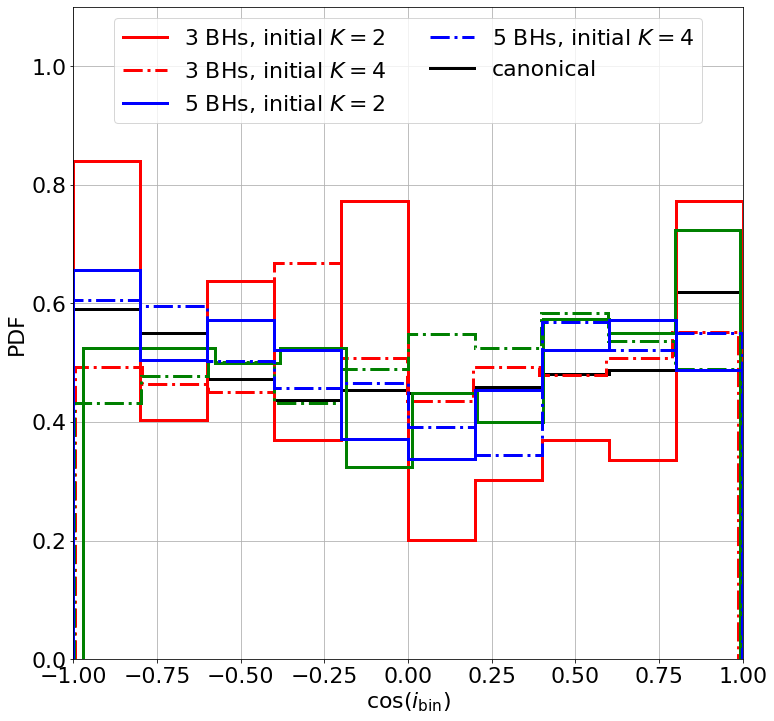

In [5]:
## 
##  Read the data for canonical-X runs
##

RH = (2e-5/3.)**(1./3.)
rc = 0.01*RH

can_CE0 = limit_rc( np.load('./data/can_CE0-2000.npy'), rc)

can_CE0 = limit_rc(np.load('./data/can_CE0-2000.npy'),rc)

dd_t5 = limit_rc(np.load('./data/df_d5tx.npy'),rc)
dd_t6 = limit_rc(np.load('./data/df_d6tx.npy'),rc)

dt_t5 = limit_rc(np.load('./data/df_dxt5.npy'),rc)
dt_t6 = limit_rc(np.load('./data/df_dxt6.npy'),rc)

d_t5t5 = limit_rc(np.load('./data/df_d5t5.npy'),rc)
d_t6t6 = limit_rc(np.load('./data/df_d6t6.npy'),rc)



##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlim([-1,1])
axs.set_ylim([0.0,1.1])

axs.set_xlabel(r'$\cos(i_{\rm bin})$')
axs.set_ylabel(r'PDF')

# parameters of the plot

bin_use = np.linspace(-1.001,1.001,21)
aluse = 0.03
lw = 3


# plot the distribution of cos(ibin)

eta = can_CE0[:,3:6]
eta = np.cos(eta[:,2])
Nuse = len(eta)
bin_use = np.linspace(-1.001,1.001,31)
axs.hist(eta,linewidth=lw,density=True,cumulative=False,histtype='step',
         edgecolor='k')

eta = dd_t5[:,3:6]
eta = np.cos(eta[:,2])
Nuse = len(eta)
bin_use = np.linspace(-1.001,1.001,21)
axs.hist(eta,linewidth=lw,density=True,cumulative=False,histtype='step',
         edgecolor='r')

eta = dd_t6[:,3:6]
eta = np.cos(eta[:,2])
Nuse = len(eta)
bin_use = np.linspace(-1.001,1.001,21)
axs.hist(eta,linewidth=lw,density=True,cumulative=False,histtype='step',
         edgecolor='r',ls='-.')


eta = dt_t5[:,3:6]
eta = np.cos(eta[:,2])
Nuse = len(eta)
bin_use = np.linspace(-1.001,1.001,21)
axs.hist(eta,linewidth=lw,density=True,cumulative=False,histtype='step',
         edgecolor='g')

eta = dt_t6[:,3:6]
eta = np.cos(eta[:,2])
Nuse = len(eta)
bin_use = np.linspace(-1.001,1.001,21)
axs.hist(eta,linewidth=lw,density=True,cumulative=False,histtype='step',
         edgecolor='g',ls='-.')


eta = d_t5t5[:,3:6]
eta = np.cos(eta[:,2])
Nuse = len(eta)
bin_use = np.linspace(-1.001,1.001,21)
axs.hist(eta,linewidth=lw,density=True,cumulative=False,histtype='step',
         edgecolor='b')

eta = d_t6t6[:,3:6]
eta = np.cos(eta[:,2])
Nuse = len(eta)
bin_use = np.linspace(-1.001,1.001,21)
axs.hist(eta,linewidth=lw,density=True,cumulative=False,histtype='step',
         edgecolor='b',ls='-.')

#eta = can_CEgw[:,3:6]
#eta = np.cos(eta[:,2])
#Nuse = len(eta)
#bin_use = np.linspace(-1.001,1.001,11)
#axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=False,histtype='step',
#         label=r'$r_{\rm p}$ by Eq.(7)',edgecolor='g')


##  Save the figure
axs.plot([],[],lw=lw,label=r'3 BHs, initial $K=2$',color='r')
axs.plot([],[],lw=lw,label=r'3 BHs, initial $K=4$',color='r',ls='-.')
axs.plot([],[],lw=lw,label=r'5 BHs, initial $K=2$',color='b')
axs.plot([],[],lw=lw,label=r'5 BHs, initial $K=4$',color='b',ls='-.')
axs.plot([],[],lw=lw,label=r'canonical',color='k')
axs.legend(loc=9,ncol=2)
axs.grid()
axs.set_axisbelow(True)


plt.savefig('./pics/pics-PDF-inc-tau.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-PDF-inc-tau.png',bbox_inches='tight',transparent=True)